## **Time Series Analysis Task Notebook**

This notebook is designed to test you through various Time Series Analysis tasks using the Bike Sharing dataset. The tasks will help you develop essential skills in handling time-based data, including cleaning and preprocessing, feature engineering, and model building. You'll explore techniques such as creating lag and rolling window features, implementing linear regression for time series prediction, and applying XGBoost with hyperparameter tuning. Finally, you'll evaluate and compare the performance of the models, providing insights into their effectiveness. These tasks will enhance your understanding of time series analysis and prepare you for real-world forecasting challenges.

# **About the Dataset**
The Bike Sharing Dataset contains information about bike rental counts in the city of Washington, D.C., recorded at hourly intervals. The dataset provides data on various factors that influence bike rentals, including weather conditions, time of day, and seasonal factors. It includes several features such as temperature, humidity, wind speed, and day of the week, which can be used for building predictive models to forecast bike rental demand.

The dataset spans multiple years and captures the number of bikes rented at each hour of the day, making it ideal for time series analysis. By leveraging this data, you can explore patterns in bike rentals over time, uncover seasonality, and implement models for predicting future rental demand.





## **Key Attributes in the Dataset:**

**instant:** Record index.

**dteday:** Date of the observation.

**season:** The season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

**yr:** Year (0: 2011, 1: 2012).

**mnth:** Month of the year (1 to 12).

**hour:** Hour of the day (0 to 23).

**holiday:** Whether the day is a holiday (1: Yes, 0: No).

**weekday:** Day of the week (0 to 6).

**workingday:** Whether it's a working day (1: Yes, 0: No).

**weathersit:** Weather condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).

**temp:** Temperature (normalized).

**hum:** Humidity (normalized).

**windspeed:** Wind speed (normalized).

**casual:** count of casual users.

**registered:** count of registered users

**cnt:** The total number of bike rentals at that hour.

This dataset offers a comprehensive set of features to explore and analyze bike-sharing patterns, making it an excellent resource for time series forecasting tasks.

## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. Clean and pre-process the dataset as required and prepare the data for modelling.
4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters

**Bonus task (Optional)**

This tasks is not mandatory, but it is designed for those who want to challenge themselves, enhance their critical thinking skills, or dive deeper into the topic. If you're eager to learn more or test your understanding, this task can provide additional learning opportunities.
1. Modelling: Implement an ARIMA model, evaluate it using relevant plots and provide a summary analysis .
  


### 1. Load the dataset from Kaggle. Use the "hour.csv" file.

In [741]:
import os
import kagglehub

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [742]:
#!pip install xgboost

In [743]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Bobby\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [744]:
import re

dataset_path = "C:/Users/Bobby/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1"
files = os.listdir(dataset_path)
#print(files)

found_file = False
for file in files:
    if re.search(r"hour.csv", file):
        file_path = dataset_path + "/" + file 
        df = pd.read_csv(file_path)
        found_file = True
        print("Succesfully loaded file: " + file)
        break
        
if not found_file:
    print("Couldn't load the file")

Succesfully loaded file: hour.csv


In [745]:
df = df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "bike count"
})

In [746]:
df

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## 2. Visualize the structure of the dataset using appropriate libraries and plots.

In [748]:
df.describe().T # the ".T" changes the way it is displayed, with the count, mean etc. on the columns instead of the rows

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  bike count  17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


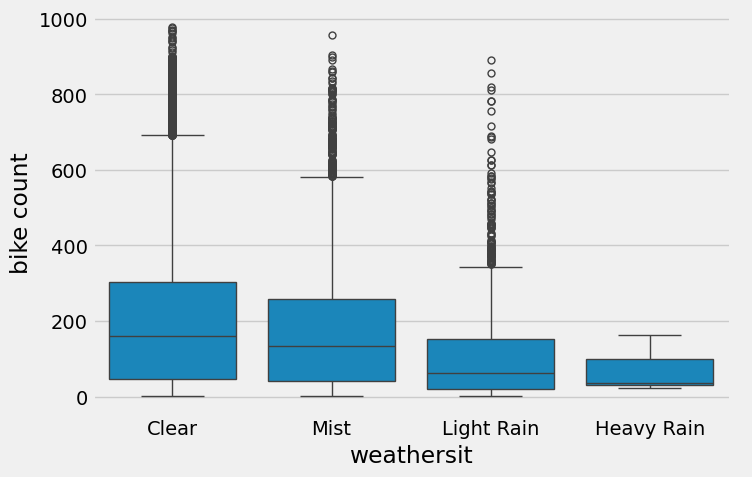

In [750]:
g = sns.catplot(data=df, x="weathersit", y="bike count", kind="box", height=5, aspect=1.5) # 1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain
g.set_xticklabels(["Clear", "Mist", "Light Rain", "Heavy Rain"])

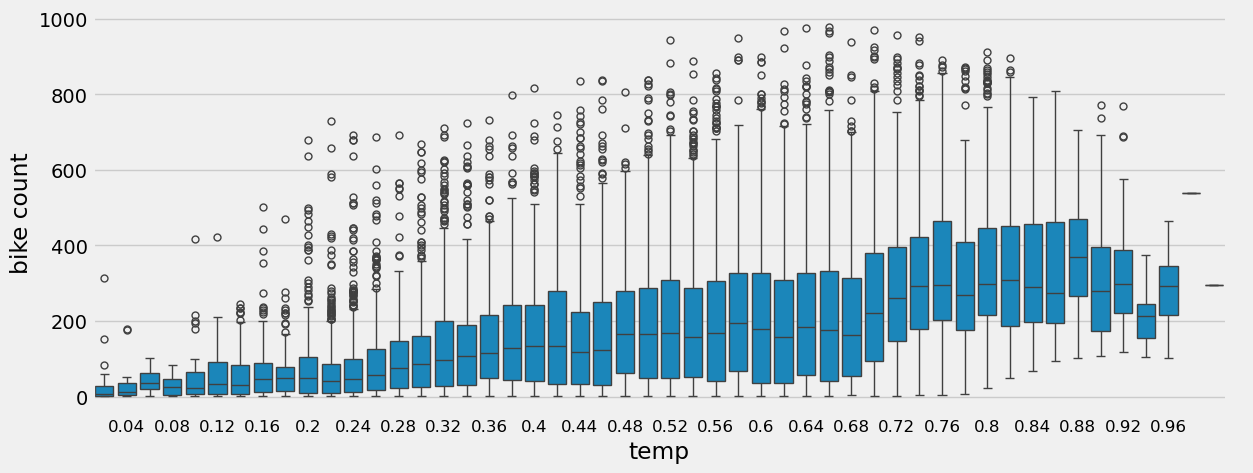

In [751]:
g = sns.catplot(data=df, x="temp", y="bike count", kind="box", height=5, aspect=2.5) # 1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain
plt.xticks(fontsize=12)
ax = plt.gca()  # Get the current axes
tick_positions = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47]  # The exact locations where you want ticks
locator = ticker.FixedLocator(tick_positions)
ax.xaxis.set_major_locator(locator)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=45) ## this prints out all the labels, super anoying

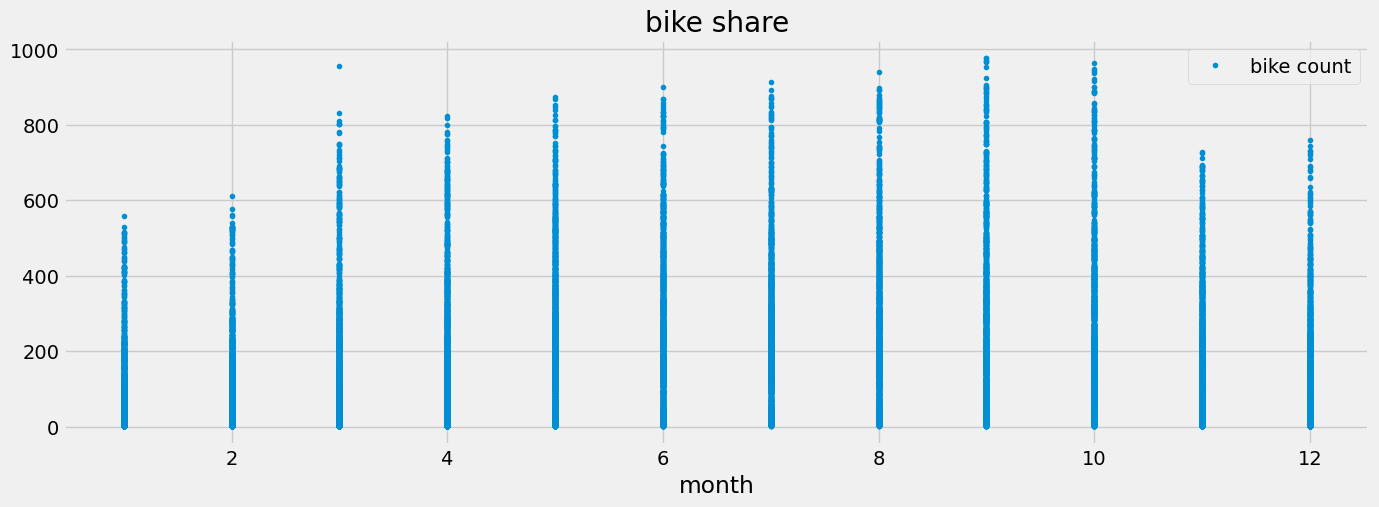

In [752]:
df.plot(style='.', x="month", y="bike count",
        figsize=(15, 5),
        color=color_pal[0],
        title='bike share')
plt.show()

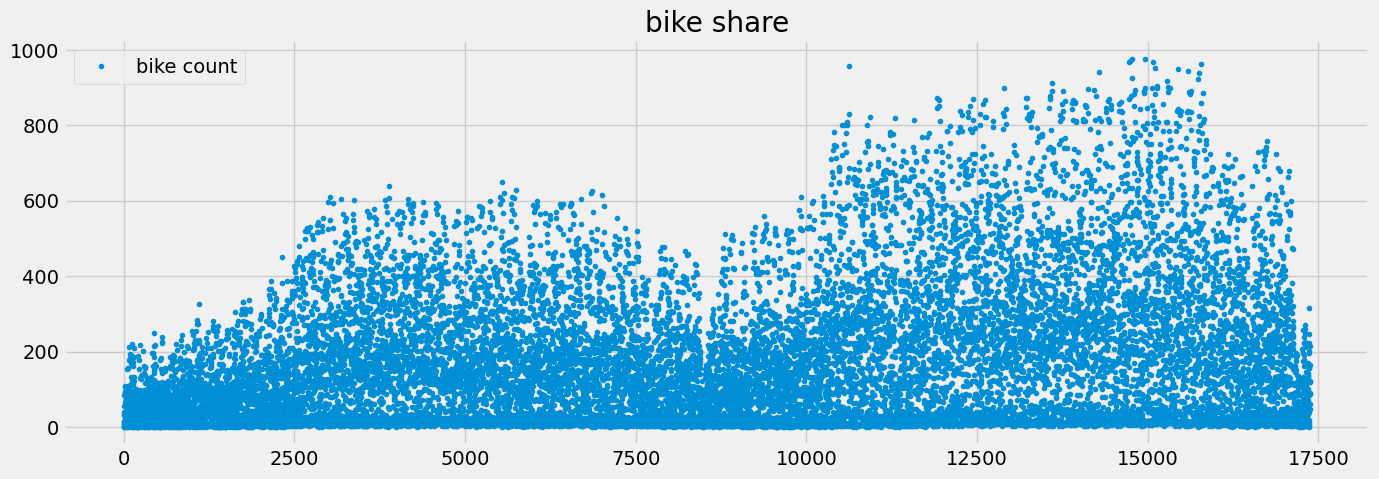

In [753]:
df.plot(style='.', y="bike count",
        figsize=(15, 5),
        color=color_pal[0],
        title='bike share')
plt.show()

## 3. Clean and pre-process the dataset as required and prepare the data for modelling.

In [755]:
df.isna().sum()

instant       0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
bike count    0
dtype: int64

In [756]:
df.duplicated().sum()

0

In [757]:
df = df.drop("instant", axis=1)

In [758]:
df['day hour'] = df["date"].astype(str) + ' ' + df['hour'].apply(lambda x: f'{x:02}:00:00') 

    Could replace the index with this "day hour" and also remove the hour column

In [760]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
#df = df.sort_index() # thinks this groups the date and calculates the sum instead, but that removes the hour column and info
df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike count,day hour
date,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00


In [761]:
start = df.index.min()
end = df.index.max()

print("Start date:       ", start)
print("End date:         ", end)

print("Interval in days: ", end - start)

Start date:        2011-01-01 00:00:00
End date:          2012-12-31 00:00:00
Interval in days:  730 days 00:00:00


 ## 4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.

In [763]:
df["lag_1d"] = df["bike count"].shift(24) # shift 1 day
#df[['bike count', 'lag_1d']].head(25)

In [764]:
df["lag_1w"] = df["bike count"].shift(7*24)
#df[['bike count', 'lag_1w']].head(7*24 + 1)

In [765]:
df["lag_1m"] = df["bike count"].shift(30*24) # shift 1 month
#df[['bike count', 'lag_1m']].head(30*24 + 1)

In [766]:
df["rolling_mean_3h"] = df["bike count"].rolling(window=3).mean()

In [767]:
df["rolling_mean_3d"] = df["bike count"].rolling(window=24*3).mean()

## 5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.

In [769]:
df.index.min()

Timestamp('2011-01-01 00:00:00')

In [770]:
df.index.max()

Timestamp('2012-12-31 00:00:00')

In [771]:
print(df.isna().sum())
df_no_null = df.copy().dropna()

print(df_no_null.isna().sum())

season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weathersit           0
temp                 0
atemp                0
hum                  0
windspeed            0
casual               0
registered           0
bike count           0
day hour             0
lag_1d              24
lag_1w             168
lag_1m             720
rolling_mean_3h      2
rolling_mean_3d     71
dtype: int64
season             0
year               0
month              0
hour               0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
casual             0
registered         0
bike count         0
day hour           0
lag_1d             0
lag_1w             0
lag_1m             0
rolling_mean_3h    0
rolling_mean_3d    0
dtype: int64


<Figure size 640x480 with 0 Axes>

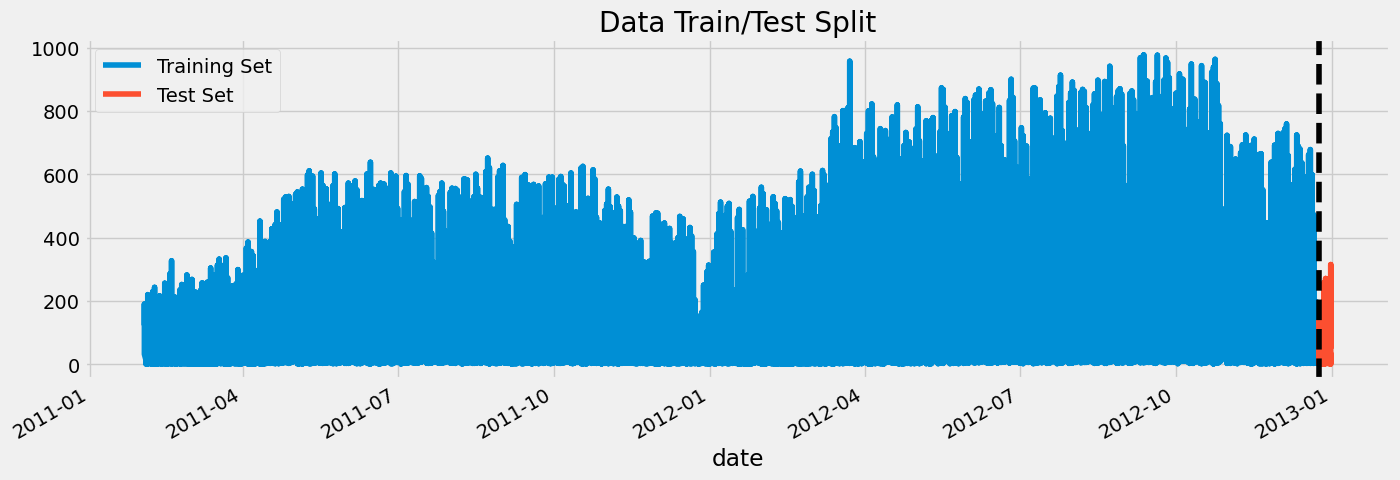

In [772]:
train = df_no_null.loc[df_no_null.index < '2012-12-24']
test = df_no_null.loc[df_no_null.index >= '2012-12-24']

plt.clf()
fig, ax = plt.subplots(figsize=(15, 5))
train["bike count"].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test["bike count"].plot(ax=ax, label='Test Set')
ax.axvline('2012-12-24', color='black', ls='--')
ax.legend(['Training Set', 'Test Set']) 
plt.show()

In [773]:
FEATURES_LR = [
    "lag_1d", "lag_1w", "weathersit", "lag_1m", "rolling_mean_3h", "rolling_mean_3d", "temp", "season"
    #"month", "lag_1d", "lag_1w", "lag_1m"
    #"month", "lag_1d", 
    ]
TARGET = 'bike count'

In [774]:
def display_actual_predict_plot(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='dashed', alpha=0.5)

    plt.xticks(fontsize=10) # should potentionally transform the date to only show the day and hour, or display hours in increment hour1, hour2...
    ax = plt.gca()  # Get the current axes
    tick_positions = [1, 40, 80, 120, 160, 200]  # The exact locations where you want ticks
    locator = ticker.FixedLocator(tick_positions)
    ax.xaxis.set_major_locator(locator)
    
    plt.title('Actual vs Predicted - Linear Regression')
    plt.xlabel('Hours')
    plt.ylabel('Bike count')
    plt.legend()
    plt.show()

In [775]:
def train_model(train_end_date, test_start_date, FEATURES_LR):
    TARGET = 'bike count'

    train = df_no_null.loc[df_no_null.index < train_end_date]
    test = df_no_null.loc[df_no_null.index >= test_start_date]
    train.index = train['day hour']
    test.index = test['day hour']

    X_train_lr = train[FEATURES_LR]
    y_train_lr = train[TARGET]
    
    X_test_lr = test[FEATURES_LR]
    y_test_lr = test[TARGET]
    
    lr = LinearRegression()

    # Train the model
    lr.fit(X_train_lr, y_train_lr)
    
    # Make predictions
    y_pred_lr = lr.predict(X_test_lr)

    # Draw plot
    display_actual_predict_plot(y_test_lr, y_pred_lr)

    RMSE = root_mean_squared_error(y_test_lr, y_pred_lr) # biased
    MAE = mean_absolute_error(y_test_lr, y_pred_lr)      # unbiased
    
    print(f"Linear Regression - RMSE: {RMSE}")
    print(f"Linear Regression - MAE:  {MAE}")

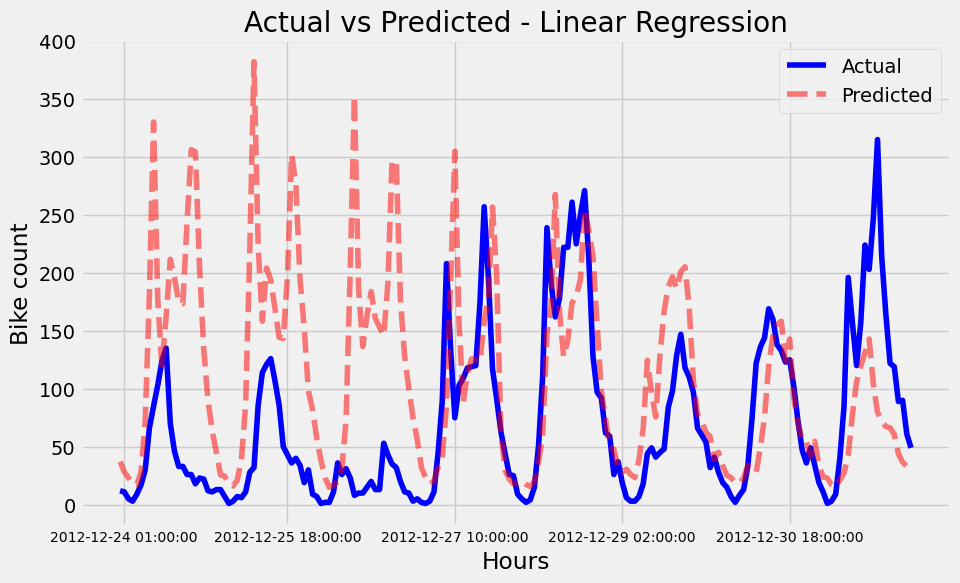

Linear Regression - RMSE: 97.96041926815734
Linear Regression - MAE:  67.21504222794772


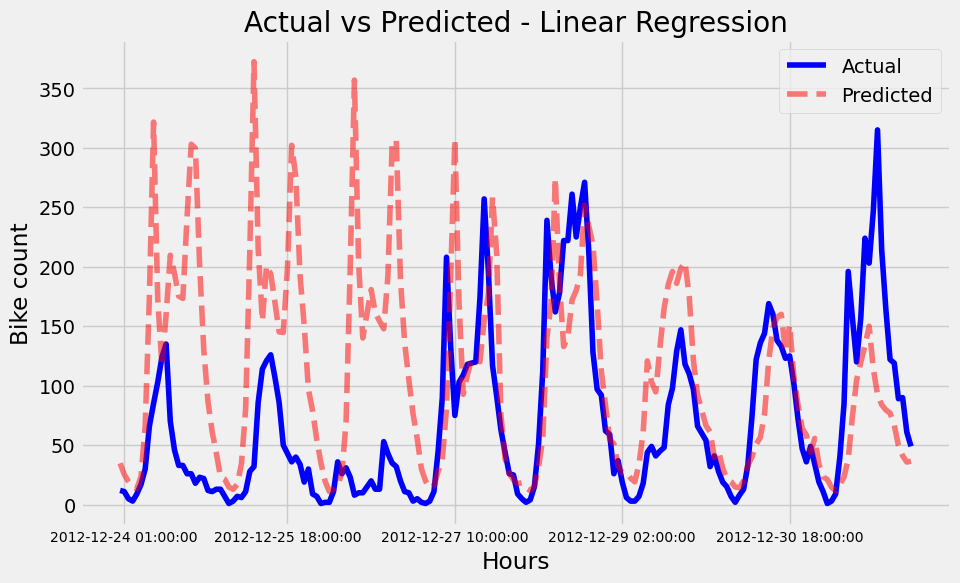

Linear Regression - RMSE: 97.61321860042638
Linear Regression - MAE:  66.7513804657121


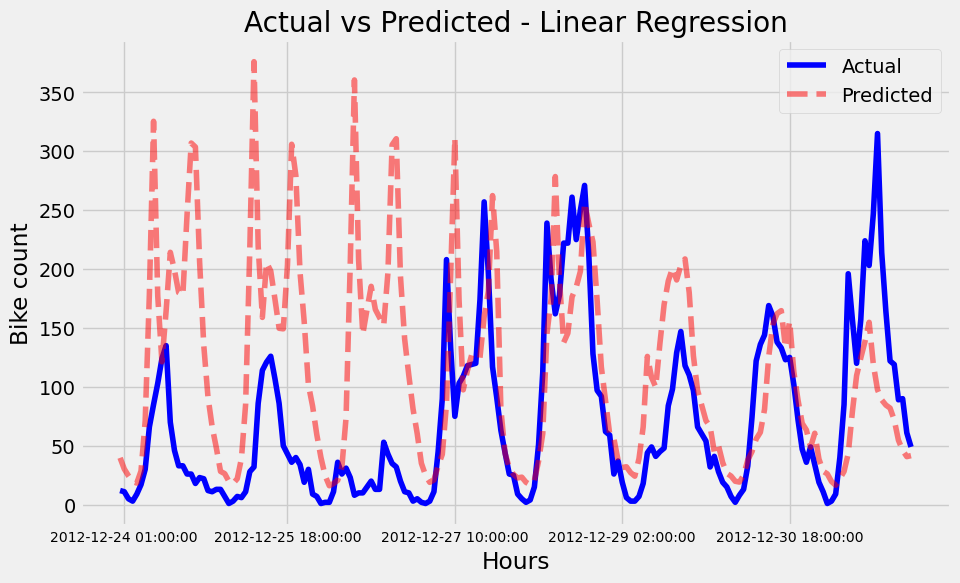

Linear Regression - RMSE: 99.37894381091371
Linear Regression - MAE:  68.99140784475198


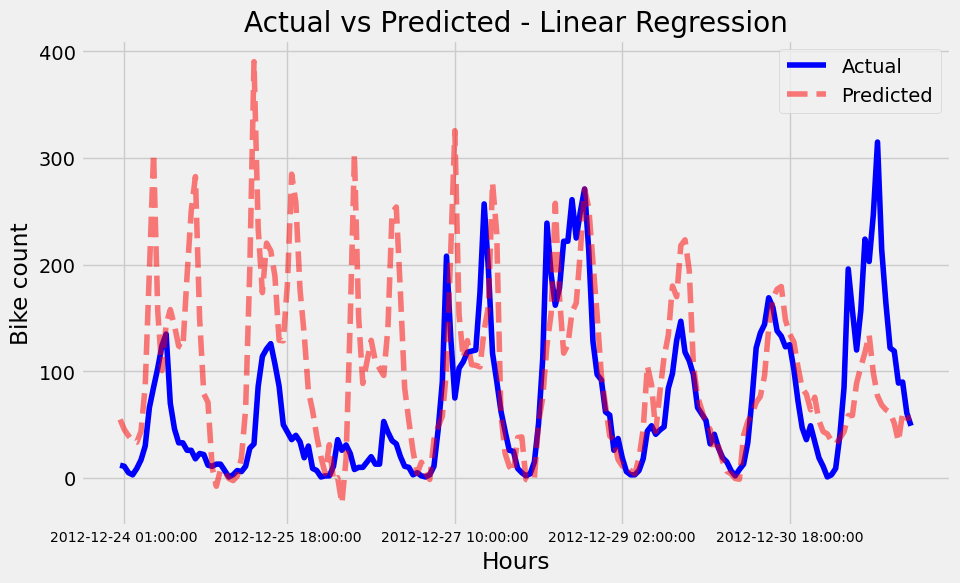

Linear Regression - RMSE: 87.40794796671703
Linear Regression - MAE:  59.7659869538726


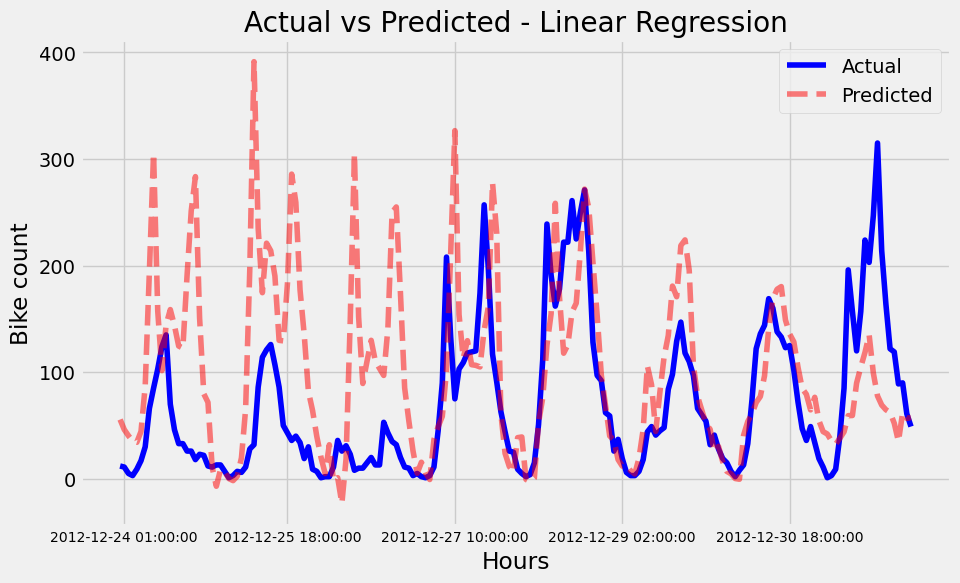

Linear Regression - RMSE: 87.70399624384721
Linear Regression - MAE:  59.997229165324406


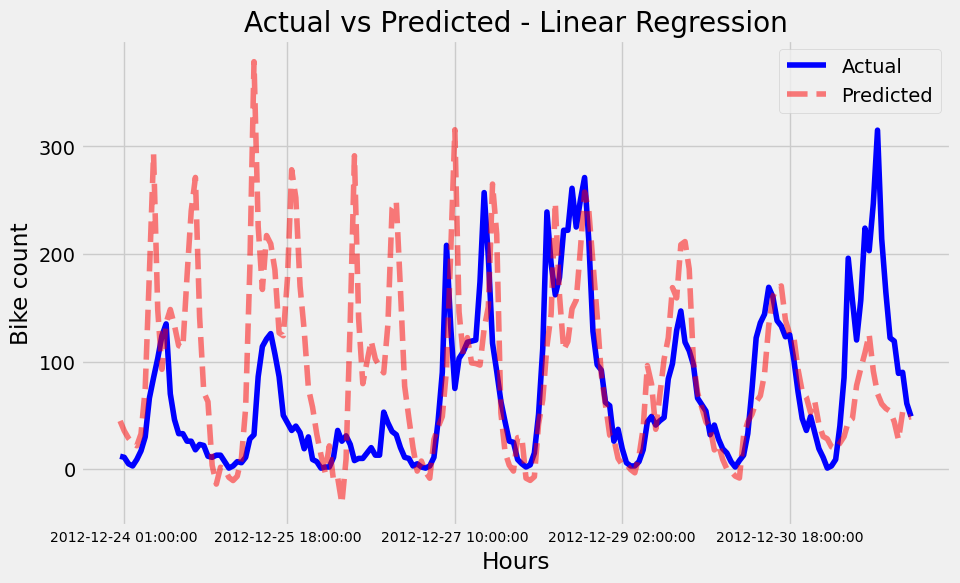

Linear Regression - RMSE: 84.71798437816872
Linear Regression - MAE:  57.83236215514361


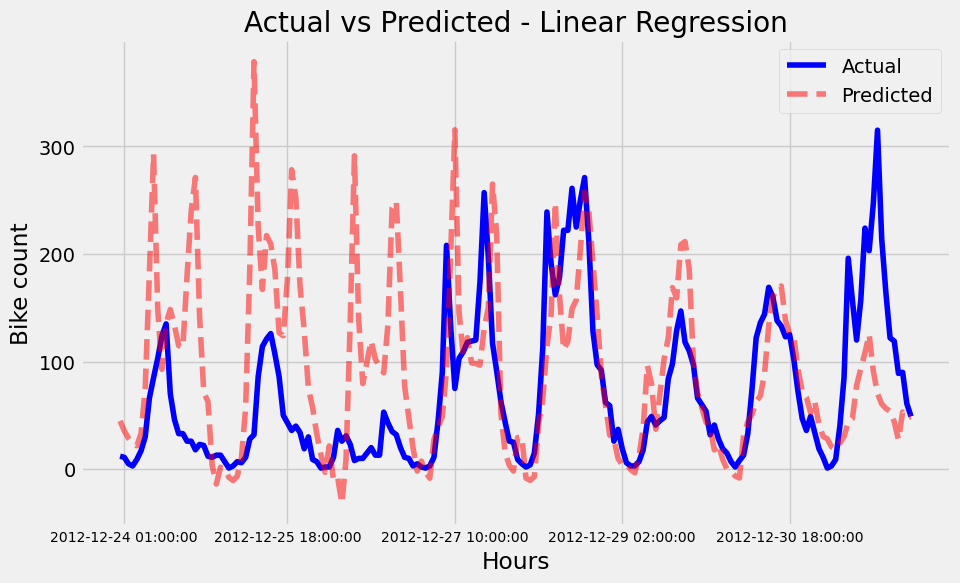

Linear Regression - RMSE: 84.71883278602502
Linear Regression - MAE:  57.83384500735491


In [776]:
train_model('2012-12-24', '2012-12-24', ["lag_1d", "lag_1w", "lag_1m", "month"])
train_model('2012-12-24', '2012-12-24', ["lag_1d", "lag_1w", "month", ])
train_model('2012-12-24', '2012-12-24', ["lag_1d", "lag_1w"])
train_model('2012-12-24', '2012-12-24', ["lag_1d", "lag_1w", "weathersit"])
train_model('2012-12-24', '2012-12-24', ["lag_1d", "lag_1w", "weathersit", "season"])
train_model('2012-12-24', '2012-12-24', ["lag_1d", "lag_1w", "weathersit", "season", "temp"])
train_model('2012-12-24', '2012-12-24', ["lag_1d", "lag_1w", "weathersit", "season", "temp", "windspeed"])

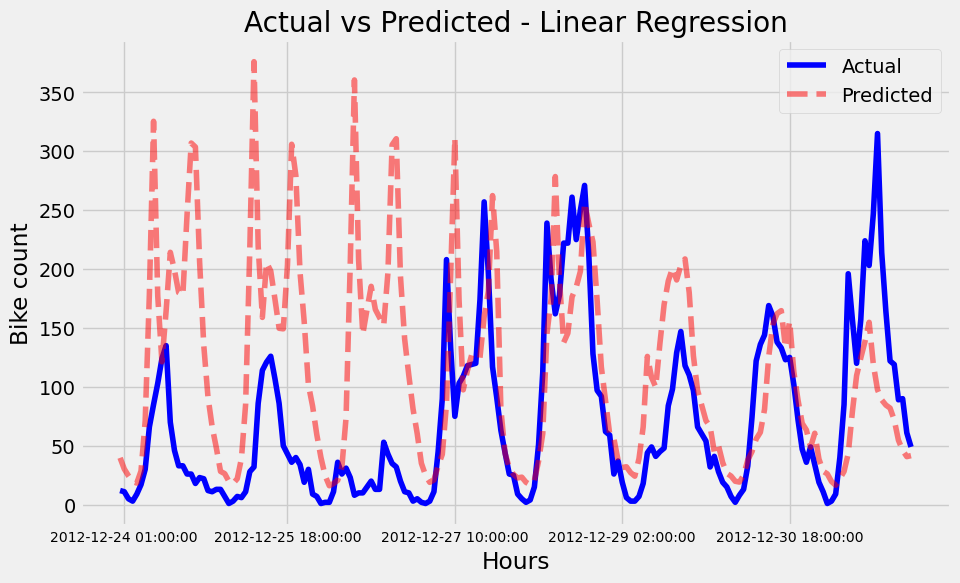

Linear Regression - RMSE: 99.37894381091371
Linear Regression - MAE:  68.99140784475198


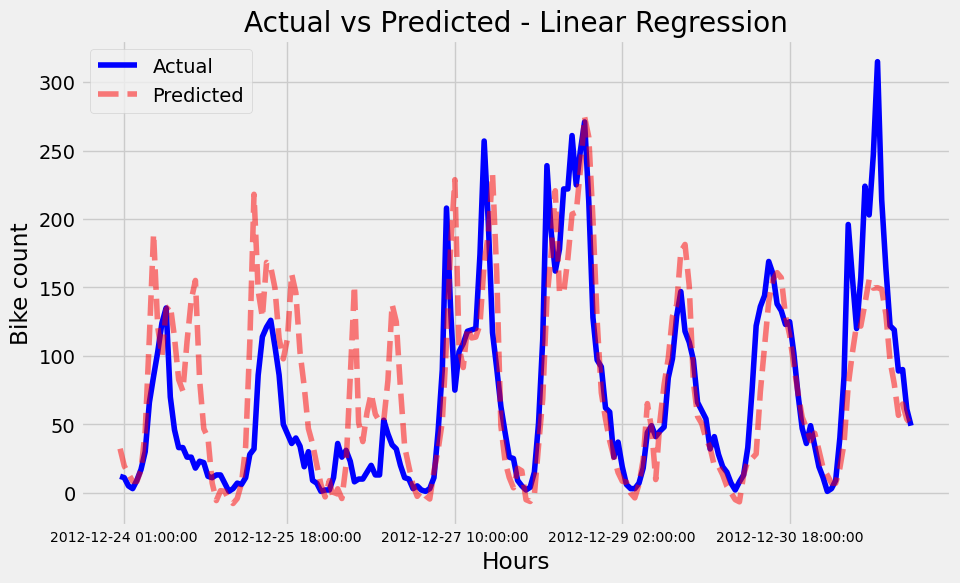

Linear Regression - RMSE: 48.40282056063576
Linear Regression - MAE:  33.10159093816908


In [777]:
# the worst
train_model('2012-12-24', '2012-12-24', ["lag_1d", "lag_1w"])

# the very best
train_model('2012-12-24', '2012-12-24', FEATURES_LR)

###  Evaluating training of linear regression
    
    Given the two error measurements, the model seem to be half decent at predicting bike count by a given hour
    Though it is long from perfect, also looking at the graph with the actual and prediction there are some patterns that it
    hasn't been able to recognise and predict

    From the worst model to the best, quite a difference, it is certainly able to predict with a decent certainty

## 6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.

In [780]:
def train_model_XG_Boost(train_end_date, test_start_date, FEATURES_XGB, params):
    TARGET = 'bike count'

    train = df_no_null.loc[df_no_null.index < train_end_date]
    test = df_no_null.loc[df_no_null.index >= test_start_date]
    train.index = train['day hour']
    test.index = test['day hour']

    X_train_xgb = train[FEATURES_XGB]
    y_train_xgb = train[TARGET]
    
    X_test_xgb = test[FEATURES_XGB]
    y_test_xgb = test[TARGET]

    dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
    dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

    watchlist = [(dtrain, 'train'), (dtest, 'eval')]
    
    num_round = 1000  # Number of boosting rounds
    early_stopping_rounds = 50  # Early stopping
    
    # Train the model
    reg = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds,verbose_eval=100)
    
    # # Predict on the test set
    y_pred_xgb = reg.predict(dtest)
    
    # # Evaluate the performance (optional, to see RMSE)
    rmse_xgb = root_mean_squared_error(y_test_xgb, y_pred_xgb)
    mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)

    # Draw plot
    display_actual_predict_plot(y_test_xgb, y_pred_xgb)
    
    print(f"XGBoost - RMSE: {rmse_xgb}")
    print(f"XGBoost - MAE:  {mae_xgb}")

In [781]:
FEATURES_XGB = [
    'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
    'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 
    'lag_1d', 'lag_1w', 'lag_1m',
    'rolling_mean_3h', 'rolling_mean_3d'
]

In [782]:
def set_params(max_depth = 3, learning_rate = 0.01, colsample_bytree = 0.8, subsample = 0.8):
    return {
        'objective': 'reg:squarederror',  # Objective function for regression
        
        'eval_metric': 'rmse',  # Evaluation metric
        
        'max_depth': max_depth, # Depth of the trees
        
        'learning_rate': learning_rate, # Learning rate
        
        'colsample_bytree': colsample_bytree,  # Subsample of features  
        
        'subsample': subsample, # Subsample ratio
    }

### with default params
    RMSE: 27.065     
    MAE:  19.78

### Best achieved outcome
    RMSE: 19.67      
    MAE:  13.00

[0]	train-rmse:181.69762	eval-rmse:142.98020
[100]	train-rmse:93.65275	eval-rmse:70.10904
[200]	train-rmse:64.13536	eval-rmse:45.22018
[300]	train-rmse:54.30640	eval-rmse:37.17612
[400]	train-rmse:50.02324	eval-rmse:33.28928
[500]	train-rmse:47.05644	eval-rmse:31.05674
[600]	train-rmse:45.03367	eval-rmse:29.44753
[700]	train-rmse:43.26781	eval-rmse:28.23448
[800]	train-rmse:41.82283	eval-rmse:27.70572
[900]	train-rmse:40.69858	eval-rmse:27.36304
[999]	train-rmse:39.60434	eval-rmse:27.06521


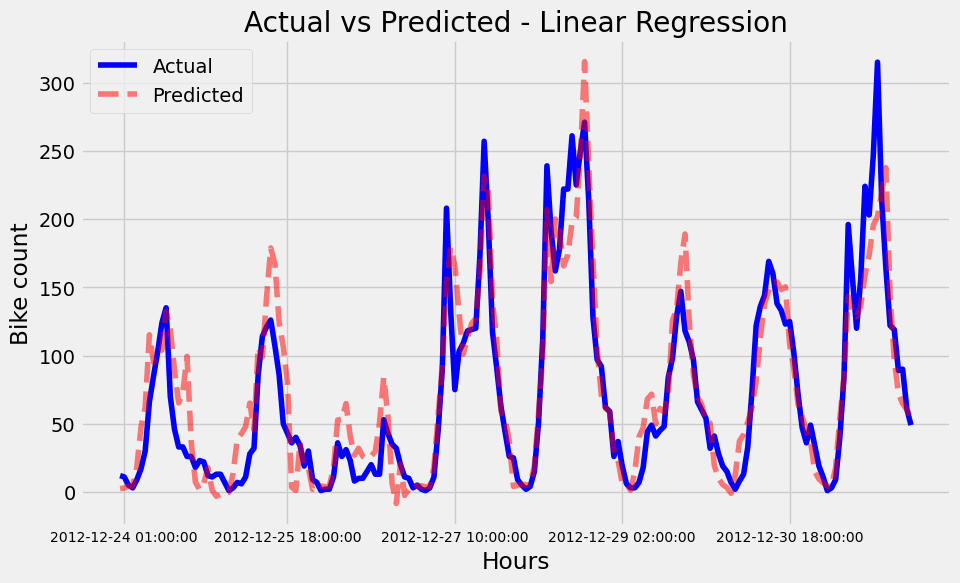

XGBoost - RMSE: 27.0652111601103
XGBoost - MAE:  19.781277302299674


In [784]:
train_model_XG_Boost('2012-12-24', '2012-12-24', FEATURES_XGB, set_params())

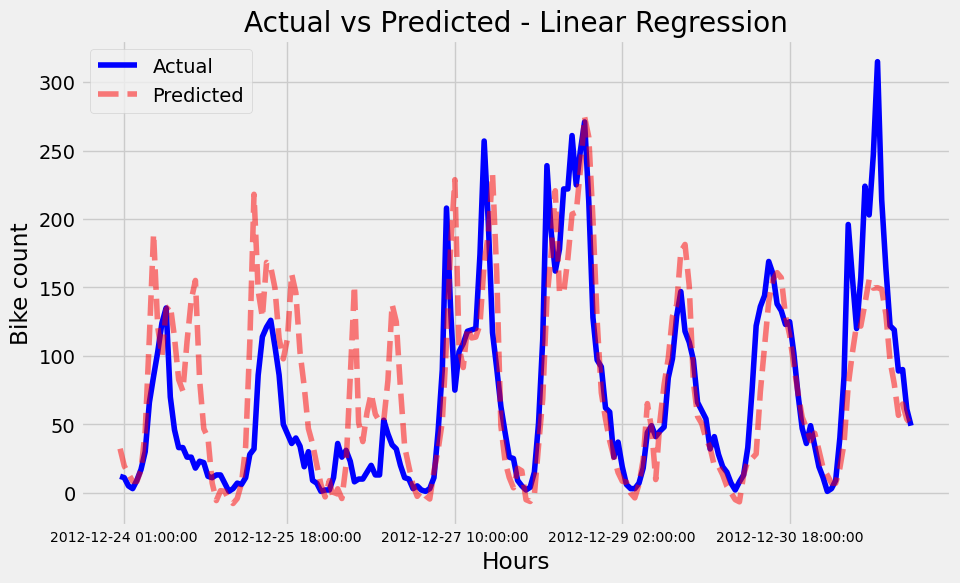

Linear Regression - RMSE: 48.40282056063576
Linear Regression - MAE:  33.10159093816908


In [785]:
train_model('2012-12-24', '2012-12-24', FEATURES_LR)

## 7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets

    24 hours of testing data

[0]	train-rmse:181.21366	eval-rmse:124.66890
[100]	train-rmse:79.23635	eval-rmse:49.61485
[200]	train-rmse:42.57528	eval-rmse:27.90813
[300]	train-rmse:29.87658	eval-rmse:24.91495
[342]	train-rmse:27.22061	eval-rmse:25.18253


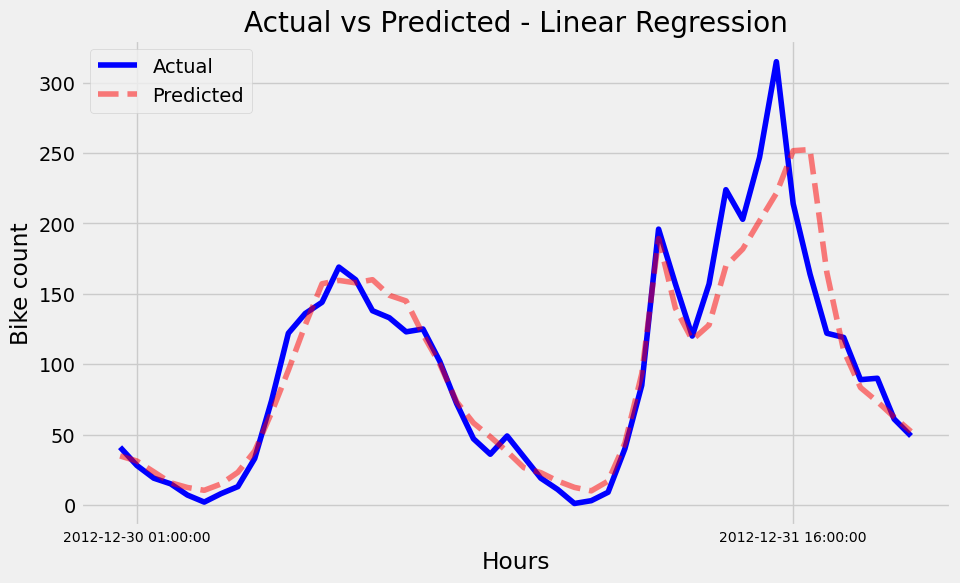

XGBoost - RMSE: 25.18252659453762
XGBoost - MAE:  15.665907502174377


In [788]:
train_model_XG_Boost('2012-12-30', '2012-12-30', FEATURES_XGB, set_params(7))

    1 week of testing data

[0]	train-rmse:181.47577	eval-rmse:142.77708
[100]	train-rmse:79.44376	eval-rmse:60.74293
[200]	train-rmse:42.75041	eval-rmse:31.38976
[300]	train-rmse:29.97847	eval-rmse:22.83490
[400]	train-rmse:24.75513	eval-rmse:20.21748
[500]	train-rmse:21.95698	eval-rmse:19.65596
[600]	train-rmse:20.19181	eval-rmse:19.45928
[636]	train-rmse:19.60840	eval-rmse:19.53619


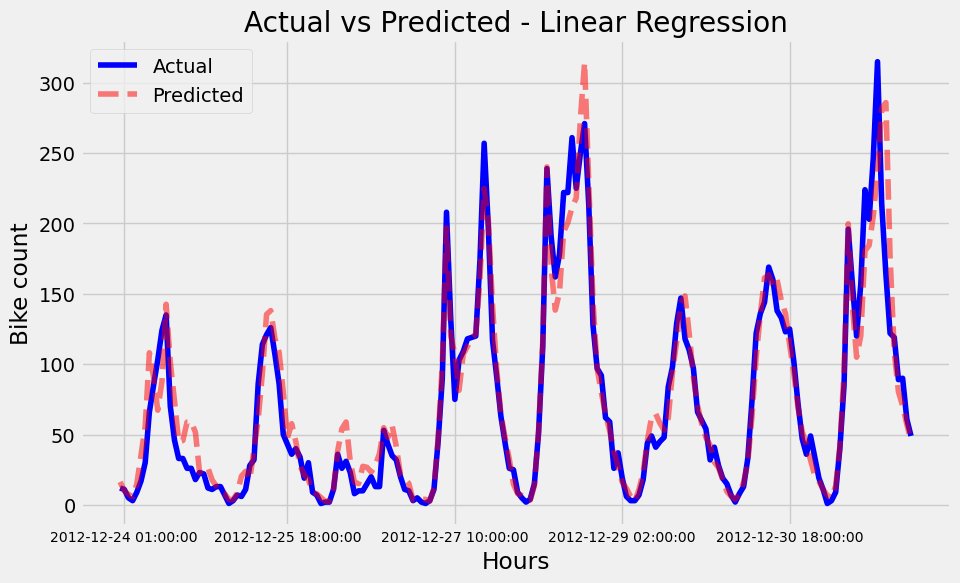

XGBoost - RMSE: 19.541156745524194
XGBoost - MAE:  12.379057571762486


In [790]:
train_model_XG_Boost('2012-12-24', '2012-12-24', FEATURES_XGB, set_params(7))

    1 month of test data

[0]	train-rmse:181.75721	eval-rmse:165.93515
[100]	train-rmse:79.42537	eval-rmse:75.81091
[200]	train-rmse:42.66005	eval-rmse:43.70719
[300]	train-rmse:29.85869	eval-rmse:32.30774
[400]	train-rmse:24.68329	eval-rmse:27.80102
[500]	train-rmse:21.89659	eval-rmse:25.74964
[600]	train-rmse:20.10227	eval-rmse:24.93332
[700]	train-rmse:18.67580	eval-rmse:24.40195
[800]	train-rmse:17.61592	eval-rmse:24.09401
[900]	train-rmse:16.70858	eval-rmse:23.86355
[999]	train-rmse:15.95517	eval-rmse:23.70198


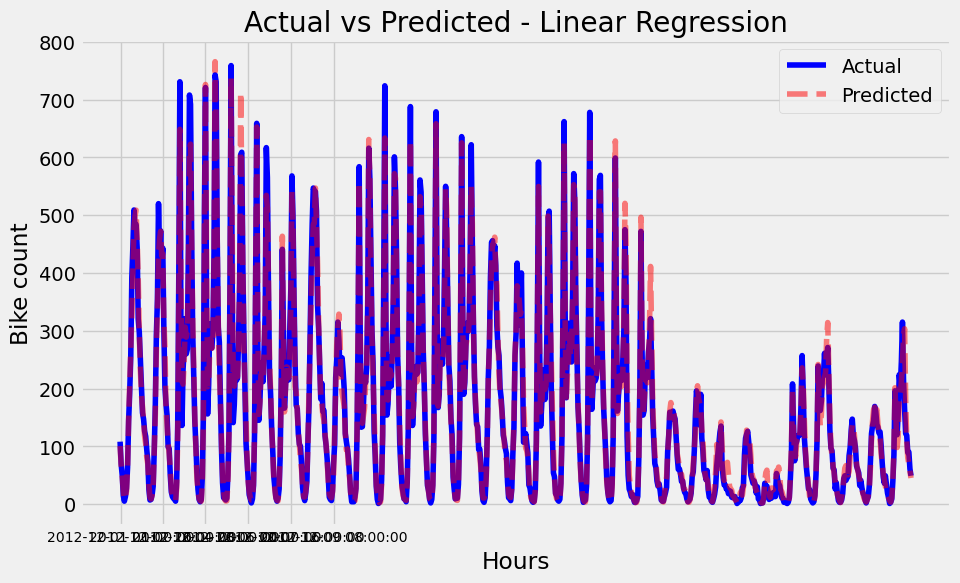

XGBoost - RMSE: 23.70198259470542
XGBoost - MAE:  14.995495663498932


In [792]:
train_model_XG_Boost('2012-12-01', '2012-12-01', FEATURES_XGB, set_params(7)) 

    a day:   24.53 & 15.00     total: 40.84
    a week:  19.54 & 12.37     total: 31.92
    1 month: 23.70 & 14.99     total: 38.69

    It would seem that the best size for training was the one week
    Need a good sizable piece to train on and one day was to small and one month a bit to large, had less training data

## 8. Experiment tuning hyperparameters

[0]	train-rmse:181.69762	eval-rmse:142.98020
[100]	train-rmse:93.65275	eval-rmse:70.10904
[200]	train-rmse:64.13536	eval-rmse:45.22018
[300]	train-rmse:54.30640	eval-rmse:37.17612
[400]	train-rmse:50.02324	eval-rmse:33.28928
[500]	train-rmse:47.05644	eval-rmse:31.05674
[600]	train-rmse:45.03367	eval-rmse:29.44753
[700]	train-rmse:43.26781	eval-rmse:28.23448
[800]	train-rmse:41.82283	eval-rmse:27.70572
[900]	train-rmse:40.69858	eval-rmse:27.36304
[999]	train-rmse:39.60434	eval-rmse:27.06521


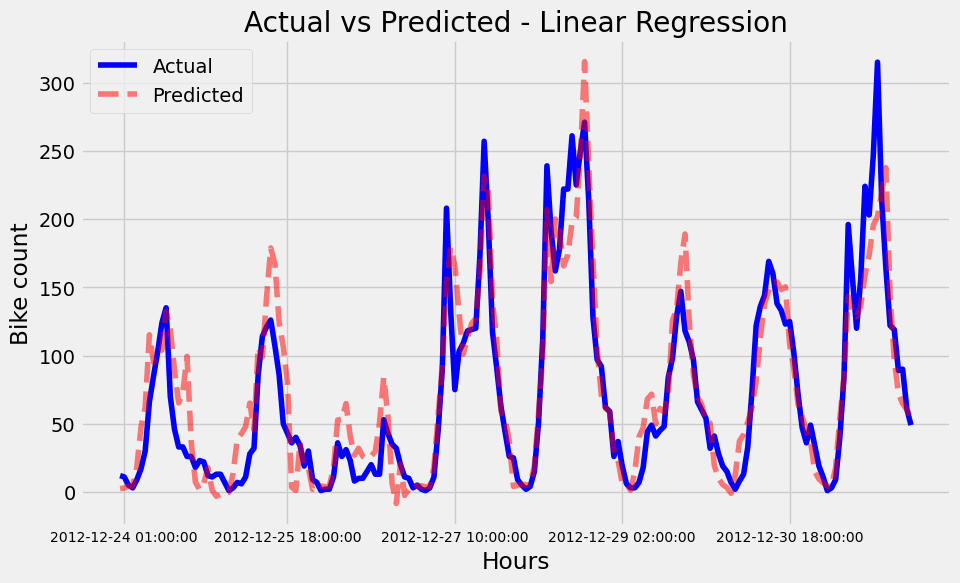

XGBoost - RMSE: 27.0652111601103
XGBoost - MAE:  19.781277302299674
[0]	train-rmse:181.57115	eval-rmse:142.84662
[100]	train-rmse:85.20312	eval-rmse:64.34812
[200]	train-rmse:51.43613	eval-rmse:35.44423
[300]	train-rmse:39.91271	eval-rmse:25.40910
[400]	train-rmse:34.83064	eval-rmse:21.58790
[500]	train-rmse:31.93939	eval-rmse:20.11818
[600]	train-rmse:30.10269	eval-rmse:19.73056
[638]	train-rmse:29.31201	eval-rmse:19.67992


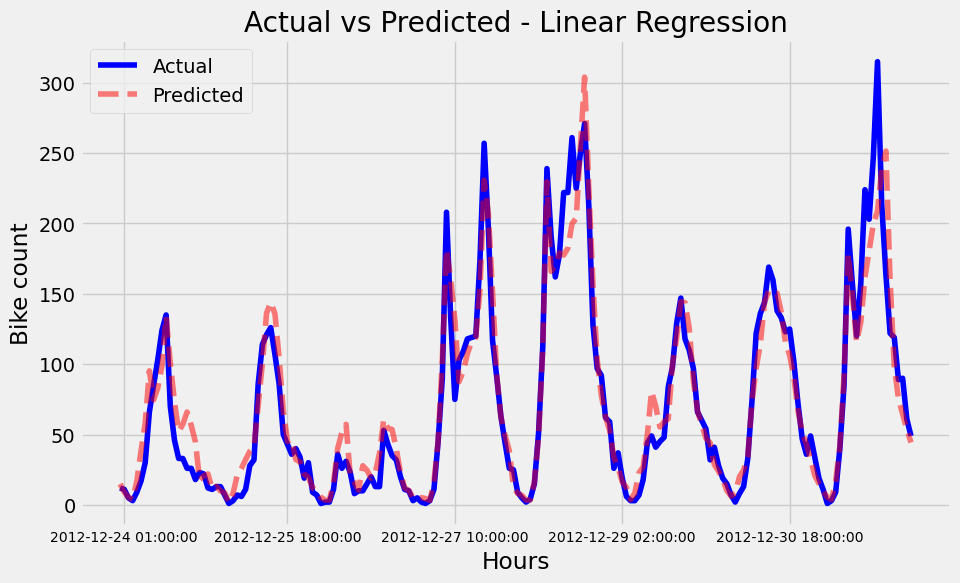

XGBoost - RMSE: 19.678194278390656
XGBoost - MAE:  13.00012228739889
[0]	train-rmse:181.47577	eval-rmse:142.77708
[100]	train-rmse:79.44376	eval-rmse:60.74293
[200]	train-rmse:42.75041	eval-rmse:31.38976
[300]	train-rmse:29.97847	eval-rmse:22.83490
[400]	train-rmse:24.75513	eval-rmse:20.21748
[500]	train-rmse:21.95698	eval-rmse:19.65596
[600]	train-rmse:20.19181	eval-rmse:19.45928
[636]	train-rmse:19.60840	eval-rmse:19.53619


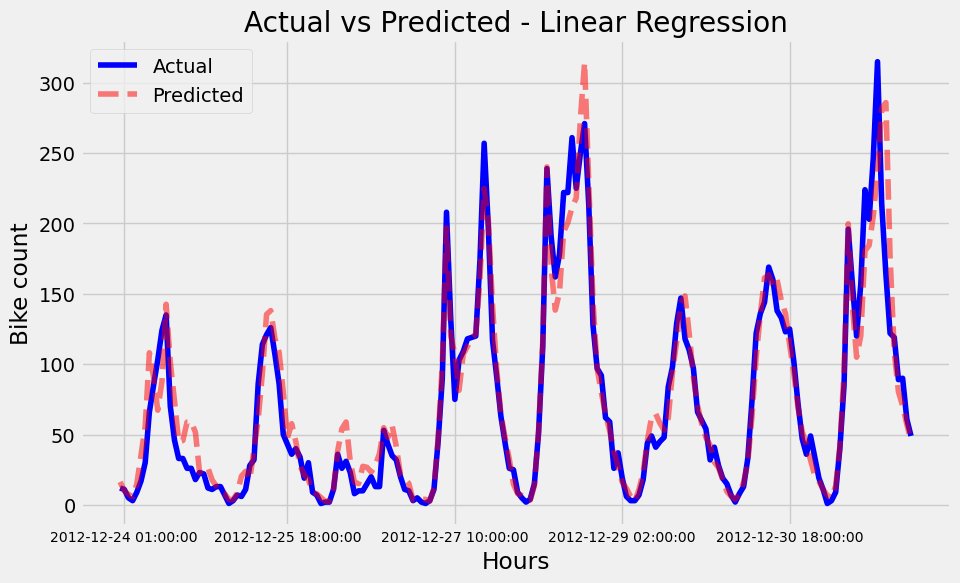

XGBoost - RMSE: 19.541156745524194
XGBoost - MAE:  12.379057571762486
[0]	train-rmse:167.19704	eval-rmse:131.09640
[100]	train-rmse:24.74269	eval-rmse:20.30265
[106]	train-rmse:24.38512	eval-rmse:20.57554


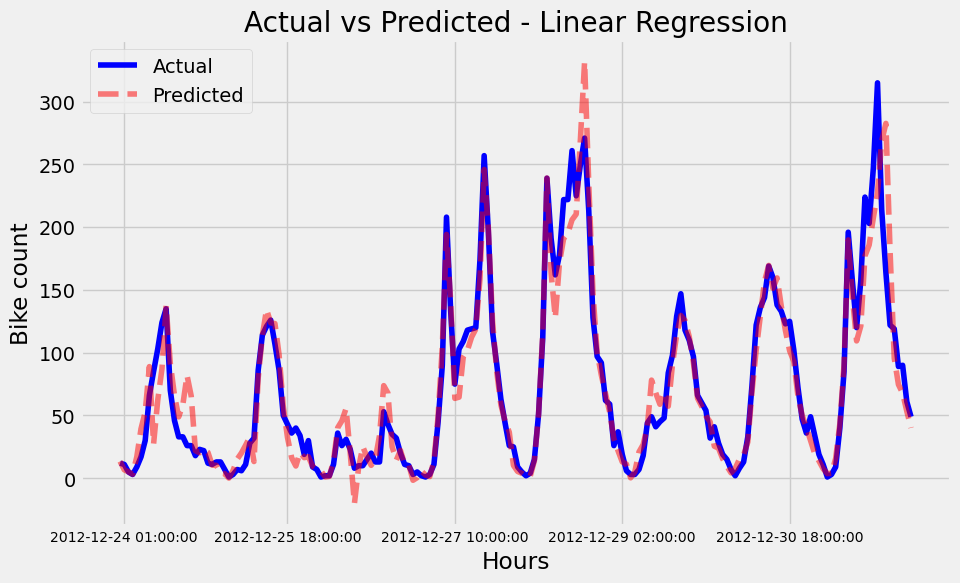

XGBoost - RMSE: 20.549674850330703
XGBoost - MAE:  13.168170076687085
[0]	train-rmse:181.56753	eval-rmse:142.86064
[100]	train-rmse:89.01085	eval-rmse:68.26981
[200]	train-rmse:55.68620	eval-rmse:41.41896
[300]	train-rmse:43.39909	eval-rmse:31.62582
[400]	train-rmse:37.50359	eval-rmse:26.73763
[500]	train-rmse:34.26179	eval-rmse:24.82943
[600]	train-rmse:32.07889	eval-rmse:23.85809
[700]	train-rmse:30.18836	eval-rmse:23.21991
[800]	train-rmse:28.89353	eval-rmse:22.83823
[898]	train-rmse:27.57347	eval-rmse:22.69473


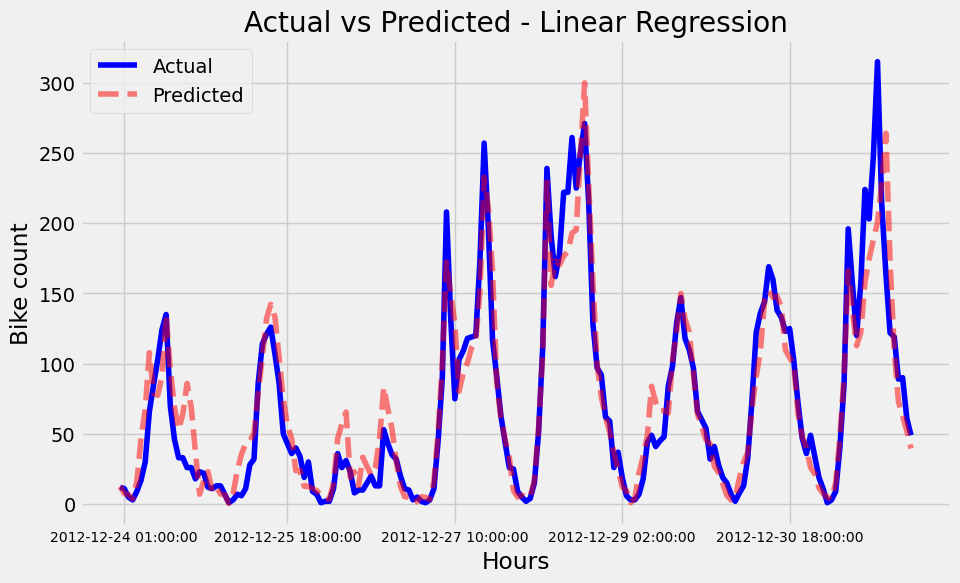

XGBoost - RMSE: 22.69473274895007
XGBoost - MAE:  15.397764784568235
[0]	train-rmse:148.36636	eval-rmse:143.73356
[100]	train-rmse:69.57879	eval-rmse:55.38347
[194]	train-rmse:64.51836	eval-rmse:50.74649


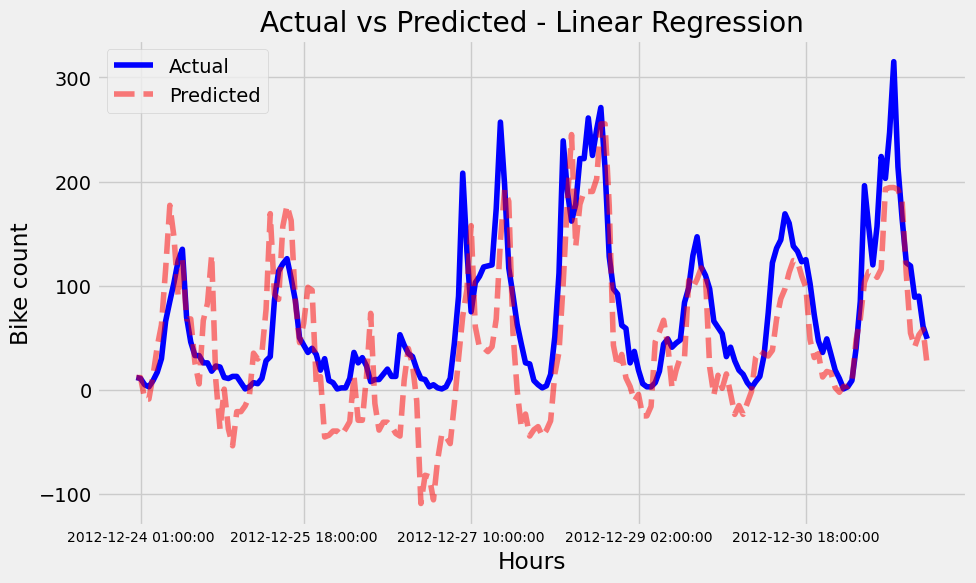

XGBoost - RMSE: 51.22917542974673
XGBoost - MAE:  41.82068224706148


In [795]:
train_model_XG_Boost('2012-12-24', '2012-12-24', FEATURES_XGB, set_params()) # default
train_model_XG_Boost('2012-12-24', '2012-12-24', FEATURES_XGB, set_params(5)) # changed max_depth = 5
train_model_XG_Boost('2012-12-24', '2012-12-24', FEATURES_XGB, set_params(7)) # changed max_depth = 7
train_model_XG_Boost('2012-12-24', '2012-12-24', FEATURES_XGB, set_params(5, 0.1)) # changed max_depth = 5 & learning_rate = 0.1
train_model_XG_Boost('2012-12-24', '2012-12-24', FEATURES_XGB, set_params(5, 0.01, 0.6, 0.6)) # changed colsample_bytree = 0.6 & subsample = 0.6
train_model_XG_Boost('2012-12-24', '2012-12-24', FEATURES_XGB, set_params(1, 0.5, 0.1, 0.1)) # bad params

    changing max_depth = 7, and leaving the rest of the hyperparameters alone gave the best result